## Машинное обучение 1, ПМИ ФКН ВШЭ

## Практическое домашнее задание 1

## 1. Табличные данные и Pandas

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import wget 
wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

'end_seminar (1).xlsx'

##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [3]:
df = pd.read_excel("end_seminar.xlsx")
df.head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543000,93ff79a51cd602f1dd3028ba2c129503,698,181.0,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,NaN,NaN,NaN
1,2020-05-15 02:46:48.066001,26b01b1c4cd5656bab18d24c548834fb,647,181.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,NaN,NaN,NaN
2,2020-05-15 03:12:41.480000,30f3653fc176d54e89ac3179c455c6dd,624,185.0,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,NaN,NaN,NaN
3,2020-05-15 04:43:08.994000,1528f0eaa027580820ccf0d92a53ad68,579,182.0,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,NaN,NaN,NaN
4,2020-05-15 07:47:17.197000,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,NaN,NaN,NaN


#### 2. [0.5 балла] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями?

In [4]:
print("Заявок из 18-го года:", df["18_group"].count())
print("Заявок из 17-го года:", df["17_group"].count())

Заявок из 18-го года: 223
Заявок из 17-го года: 138


In [5]:
df["percentile"].value_counts()

0.807971    2
0.795964    2
0.773543    2
0.526906    2
0.293478    2
           ..
0.560538    1
0.843049    1
0.385650    1
0.739910    1
0.369565    1
Name: percentile, Length: 346, dtype: int64

Как мы видим - да, такие студенты есть.

#### 3. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [6]:
len(df)

361

In [7]:
df.describe()

,rating,18_group,is_mi,percentile,17_group,is_ml_student
count,361.000000,223.000000,18.0,361.000000,138.000000,57.0
mean,833.346260,184.520179,1.0,0.497230,173.355072,1.0
std,266.665103,2.271701,0.0,0.289071,1.795374,0.0
min,495.000000,181.000000,1.0,0.000000,171.000000,1.0
25%,613.000000,183.000000,1.0,0.246637,172.000000,1.0
50%,697.000000,185.000000,1.0,0.497758,173.000000,1.0
75%,1111.000000,187.000000,1.0,0.746377,175.000000,1.0
max,1457.000000,188.000000,1.0,0.995516,177.000000,1.0


Пропуски есть, всего строк 361. Далее в выводе смотрим строку `count` - здесь мы видим количество валидных значений, следовательно, `361 - #quantity` - это число пропусков. Однако это решение нам не особо подходит, так как в учет идут только числовые данные. Попробуем другой подход:

In [8]:
df.isnull().sum(axis = 0)

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

Здесь мы уже явно видим, сколько в каждом столбце невалидных значений.

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [9]:
df.dtypes

timestamp        datetime64[ns]
id                       object
rating                    int64
18_group                float64
is_mi                   float64
fall_1                   object
fall_2                   object
fall_3                   object
spring_1                 object
spring_2                 object
spring_3                 object
is_first_time            object
percentile              float64
17_group                float64
blended                  object
is_ml_student           float64
dtype: object

In [10]:
df = df.fillna({'is_first_time':'', 'blended':''}).fillna(0)
df.isnull().sum(axis = 0)

timestamp        0
id               0
rating           0
18_group         0
is_mi            0
fall_1           0
fall_2           0
fall_3           0
spring_1         0
spring_2         0
spring_3         0
is_first_time    0
percentile       0
17_group         0
blended          0
is_ml_student    0
dtype: int64

In [11]:
df.head(15)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543000,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0
1,2020-05-15 02:46:48.066001,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0
2,2020-05-15 03:12:41.480000,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0
3,2020-05-15 04:43:08.994000,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0
4,2020-05-15 07:47:17.197000,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0
5,2020-05-15 09:10:18.558000,d0d8ff53ed5b119f9056068e954256c6,591,187.0,0.0,Язык SQL,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Численные методы,Дискретная оптимизация,Да,0.690583,0.0,,0.0
6,2020-05-15 11:42:16.910000,e4caca755ee0bdd711e18fb8084958b5,724,181.0,0.0,Statistical Learning Theory,Безопасность компьютерных систем,Моделирование временных рядов,Численные методы,Промышленное программирование на языке Java,Машинное обучение 2,Да,0.103139,0.0,,0.0
7,2020-05-15 12:11:43.252000,8047c18b3c531c6f47931e0744f3e028,566,187.0,0.0,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Да,0.802691,0.0,,0.0
8,2020-05-15 13:21:40.913000,e8b314842f176be9051d14a07cb156cb,618,181.0,0.0,Язык SQL,Теория баз данных,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Да,0.565022,0.0,,0.0
9,2020-05-15 13:29:10.789000,d6c079f1ff869c8c84fa3ed30bd67e0e,733,181.0,0.0,Теория баз данных,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Дополнительные главы прикладной статистики,Анализ данных в бизнесе,Численные методы,Да,0.085202,0.0,,1.0


#### 4. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'. 

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. <i>Обращения со значением "Нет" в <code>is_first_time</code> могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [12]:
df['is_first_time'].value_counts()

Да     308
Нет     51
         2
Name: is_first_time, dtype: int64

"Нет" - 51.

In [13]:
df['id'].value_counts()

f8fab519d78047712c06798c8b7fe38f    2
8aa0f1b7331b49464174b02cd693be52    2
5c49473012411a1eee72f8ea63767adf    2
a65d50ef4fadfac64508a54e972d8623    2
9a66d84568b8017d98eb2e678b57296b    2
                                   ..
6cd7de3774f07c65e44668cdf7e987b6    1
2f8a48924249d2231659183d7654ed33    1
ecc19831d7abd064f0488a9af2521920    1
a19f36ae8465cac527e8ce7b6ebf1213    1
f2d210ace25a841e1e58036b257d5d47    1
Name: id, Length: 347, dtype: int64

In [14]:
df.sort_values(by=['id', 'timestamp'], inplace=True)
df.tail(20)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
163,2020-05-18 22:09:23.107000,f81cc449798c2d8971612dc9a749ad2a,637,186.0,0.0,Высокопроизводительные вычисления,Язык SQL,Моделирование временных рядов,Компьютерные сети,Анализ данных в бизнесе,Дискретная оптимизация,Нет,0.470852,0.0,,0.0
49,2020-05-17 16:39:53.941000,f8c83b338162bb41af2851b5e62f84d0,547,185.0,0.0,Теория баз данных,Язык SQL,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Да,0.878924,0.0,,0.0
141,2020-05-18 21:34:22.233000,f8fab519d78047712c06798c8b7fe38f,561,185.0,1.0,Теория баз данных,Моделирование временных рядов,Язык SQL,Промышленное программирование на языке Java,Машинное обучение 2,Компьютерные сети,Да,0.822870,0.0,,0.0
150,2020-05-18 21:49:22.232999,f8fab519d78047712c06798c8b7fe38f,561,185.0,1.0,Моделирование временных рядов,Теория баз данных,Язык SQL,Промышленное программирование на языке Java,Машинное обучение 2,Компьютерные сети,Нет,0.822870,0.0,,0.0
352,2020-05-18 23:59:20.831000,f93afd8e92c336b471aa3bbbc579aefe,1298,0.0,0.0,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Методы сжатия и передачи медиаданных,Проектирование и разработка высоконагруженных ...,Конфликты и кооперация,Да,0.057971,175.0,DevOps,0.0
193,2020-05-18 23:38:11.238001,f941beb89ecc5c59076bcfa79691116c,610,186.0,1.0,Теория баз данных,Принятие решений в условиях риска и неопределё...,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Анализ данных в бизнесе,Системы баз данных,Да,0.605381,0.0,,0.0
320,2020-05-18 22:14:40.670000,f98ac9a12b43a53c0fa44491cb56890c,1147,0.0,0.0,Байесовские методы машинного обучения,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,Да,0.528986,171.0,DevOps,0.0
72,2020-05-18 14:44:19.585999,fa4860bc719aadedbb00ba027067a8b7,642,187.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,Да,0.448430,0.0,,0.0
309,2020-05-18 21:09:04.370000,fa61e55c68763160d0fffe57dab37af9,1121,0.0,0.0,Анализ неструктурированных данных,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,Да,0.630435,172.0,DevOps,0.0
119,2020-05-18 20:34:07.220000,fc2c60b8004aa91bc272df84628621ff,639,183.0,0.0,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Системы баз данных,Машинное обучение 2,Анализ данных в бизнесе,Нет,0.461883,0.0,,1.0


In [15]:
# https://coderoad.ru/51659207/Удалить-дубликаты-из-серии-pandas-на-основе-условия
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
df.drop_duplicates(subset=['id'], keep='last', inplace=True)
df.tail(20)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
101,2020-05-18 19:09:00.945001,f736e00dc03850c59649e77149895d5a,652,186.0,0.0,Высокопроизводительные вычисления,Язык SQL,Безопасность компьютерных систем,Машинное обучение 2,Промышленное программирование на языке Java,Численные методы,Да,0.403587,0.0,,0.0
206,2020-05-18 23:59:29.314000,f7f123322f77fd451a30ed4979c323fc,578,185.0,0.0,Язык SQL,Безопасность компьютерных систем,Теория баз данных,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Нет,0.748879,0.0,,0.0
163,2020-05-18 22:09:23.107000,f81cc449798c2d8971612dc9a749ad2a,637,186.0,0.0,Высокопроизводительные вычисления,Язык SQL,Моделирование временных рядов,Компьютерные сети,Анализ данных в бизнесе,Дискретная оптимизация,Нет,0.470852,0.0,,0.0
49,2020-05-17 16:39:53.941000,f8c83b338162bb41af2851b5e62f84d0,547,185.0,0.0,Теория баз данных,Язык SQL,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Да,0.878924,0.0,,0.0
150,2020-05-18 21:49:22.232999,f8fab519d78047712c06798c8b7fe38f,561,185.0,1.0,Моделирование временных рядов,Теория баз данных,Язык SQL,Промышленное программирование на языке Java,Машинное обучение 2,Компьютерные сети,Нет,0.822870,0.0,,0.0
352,2020-05-18 23:59:20.831000,f93afd8e92c336b471aa3bbbc579aefe,1298,0.0,0.0,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Методы сжатия и передачи медиаданных,Проектирование и разработка высоконагруженных ...,Конфликты и кооперация,Да,0.057971,175.0,DevOps,0.0
193,2020-05-18 23:38:11.238001,f941beb89ecc5c59076bcfa79691116c,610,186.0,1.0,Теория баз данных,Принятие решений в условиях риска и неопределё...,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Анализ данных в бизнесе,Системы баз данных,Да,0.605381,0.0,,0.0
320,2020-05-18 22:14:40.670000,f98ac9a12b43a53c0fa44491cb56890c,1147,0.0,0.0,Байесовские методы машинного обучения,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,Да,0.528986,171.0,DevOps,0.0
72,2020-05-18 14:44:19.585999,fa4860bc719aadedbb00ba027067a8b7,642,187.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,Да,0.448430,0.0,,0.0
309,2020-05-18 21:09:04.370000,fa61e55c68763160d0fffe57dab37af9,1121,0.0,0.0,Анализ неструктурированных данных,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,Да,0.630435,172.0,DevOps,0.0


Что я сделал: сначала отсортировал по времени заявки, затем по айди - вышло так, что заявки одного и того же студента были рядом друг с другом, что позволило воспользоваться функцией, удаляющей дубликаты с возможностью сохранения последнего. Так как мы сортировали по времени, после удаления у нас остались лишь последние записи.

#### 5. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из курсов собрались студенты с самым высоким средним рейтингом? 

In [16]:
df['blended'].value_counts()

                                         213
DevOps                                    87
Соревновательный анализ данных            32
Введение в дифференциальную геометрию     15
Name: blended, dtype: int64

Вот такие курсы выбирали студенты, больше всего пошло на DevOps.

In [17]:
from numpy import mean as nmean
grouped = pd.pivot_table(data=df,index=['blended'],aggfunc={'rating':nmean})
grouped

,rating
blended,
,633.901408
DevOps,1154.172414
Введение в дифференциальную геометрию,1210.733333
Соревновательный анализ данных,1144.218750


Если я правильно понял задание, то на "Введении в дифференциальную геометрию" рейтинг студентов выше всех. Если же я неправильно понял задание, и требовалось посмотреть, на какие курсы записались топовые студенты, можно сделать так:

In [18]:
df.sort_values(by=['percentile'])[['percentile', 'blended']].head(20)

,percentile,blended
231,0.000000,Введение в дифференциальную геометрию
80,0.000000,
91,0.004484,
273,0.007246,DevOps
19,0.008969,
94,0.013453,
323,0.014493,DevOps
158,0.017937,
250,0.021739,Соревновательный анализ данных
84,0.022422,


А здесь уже картина другая - DevOps в выигрыше, так как большинство лучших студентов пошли именно туда.

#### 6. [1 балл] Выясните, есть ли в данных студенты с абсолютно одинаковыми предпочтениями по всем курсам (не забудьте учесть blended-курсы для четверокурсников). Сколько таких наборов, которые взяли несколько студентов? Выведите их все вместе с количеством выбравших их студентов.

<i>Предпочтения двух студентов считаются абсолютно одинаковыми, если выбранные ими дисциплины имеют одинаковый приоритет.</i>

In [19]:
dfg = df.groupby(['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'], as_index=False).size()
dfg.head()

,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended,size
0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,DevOps,2
1,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Соревновательный анализ данных,1
2,Statistical Learning Theory,Байесовские методы машинного обучения,Безопасность компьютерных систем,Проектирование и разработка высоконагруженных ...,Компьютерное зрение,Символьные вычисления,Введение в дифференциальную геометрию,1
3,Statistical Learning Theory,Байесовские методы машинного обучения,Высокопроизводительные вычисления,Символьные вычисления,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Введение в дифференциальную геометрию,1
4,Statistical Learning Theory,Байесовские методы машинного обучения,Моделирование временных рядов,Символьные вычисления,Компьютерное зрение,Конфликты и кооперация,Введение в дифференциальную геометрию,1


Вот такие вот наборы:

In [20]:
dfg.sort_values('size', ascending=False)[dfg['size'] >= 2]

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended,size
102,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,,3
72,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,,3
0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,DevOps,2
313,Язык SQL,Высокопроизводительные вычисления,Теория баз данных,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,,2
155,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,,2
184,Высокопроизводительные вычисления,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,DevOps,2
137,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,,2
201,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Методы сжатия и передачи медиаданных,DevOps,2
113,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,,2
105,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,,2


#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [21]:
y18 = set(np.unique(df[df['18_group'] >= 180][['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3']].values).tolist())
y17 = set(np.unique(df[df['17_group'] >= 170][['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3']].values).tolist())
print(y18, '\n\n', y17)

{'Теория баз данных', 'Компьютерные сети', 'Моделирование временных рядов', 'Численные методы', 'Дискретная оптимизация', 'Промышленное программирование на языке Java', 'Матричные вычисления', 'Язык SQL', 'Принятие решений в условиях риска и неопределённости', 'Системы баз данных', 'Дополнительные главы прикладной статистики', 'Сбор и обработка данных с помощью краудсорсинга', 'Анализ данных в бизнесе', 'Statistical Learning Theory', 'Безопасность компьютерных систем', 'Машинное обучение 2', 'Высокопроизводительные вычисления'} 

 {'Глубинное обучение в обработке звука', 'Компьютерное зрение', 'Обучение с подкреплением', 'Конфликты и кооперация', 'Проектирование и разработка высоконагруженных сервисов', 'Моделирование временных рядов', 'Символьные вычисления', 'Анализ неструктурированных данных', 'Численные методы', 'Байесовские методы машинного обучения', 'Методы сжатия и передачи медиаданных', 'Генеративные модели в машинном обучении', 'Сбор и обработка данных с помощью краудсорсинга

Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [22]:
# Только за 17 год
y17 - (y17 & y18)

{'Анализ неструктурированных данных',
 'Байесовские методы машинного обучения',
 'Генеративные модели в машинном обучении',
 'Глубинное обучение в обработке звука',
 'Компьютерное зрение',
 'Конфликты и кооперация',
 'Методы сжатия и передачи медиаданных',
 'Обучение с подкреплением',
 'Проектирование и разработка высоконагруженных сервисов',
 'Символьные вычисления'}

In [23]:
# Только за 18 год
y18 - (y17 & y18)

{'Анализ данных в бизнесе',
 'Дискретная оптимизация',
 'Дополнительные главы прикладной статистики',
 'Компьютерные сети',
 'Матричные вычисления',
 'Машинное обучение 2',
 'Промышленное программирование на языке Java',
 'Системы баз данных',
 'Теория баз данных',
 'Язык SQL'}

### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Полезные строчки:
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

In [25]:
# https://ru.stackoverflow.com/questions/949501/Как-сгруппировать-по-дню-и-посчитать-среднее-значение-столбца
dfg = df.groupby(pd.Grouper(key='timestamp', freq='D'))['rating'].mean().reset_index()
dfg.rename(columns={'timestamp':'day'}, inplace=True)
dfg.head()

,day,rating
0,2020-05-14,1160.277778
1,2020-05-15,719.866667
2,2020-05-16,736.400000
3,2020-05-17,915.027027
4,2020-05-18,827.352679


In [26]:
dfg.dtypes

day       datetime64[ns]
rating           float64
dtype: object

In [27]:
# https://stackoverflow.com/questions/19502506/convert-numpy-datetime64-to-string-object-in-python
dfg['day'] = dfg['day'].astype(str).str[-2:]
dfg.dtypes

day        object
rating    float64
dtype: object

In [28]:
dfg.head()

,day,rating
0,14,1160.277778
1,15,719.866667
2,16,736.400000
3,17,915.027027
4,18,827.352679


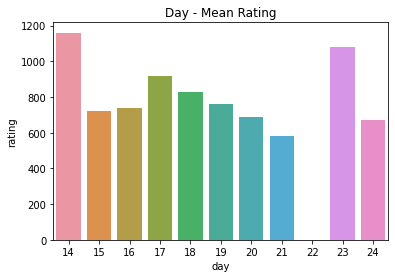

In [29]:
import seaborn as sns

fig, ax = plt.subplots()
sns.barplot(x='day', y='rating', data=dfg)
plt.title('Day - Mean Rating')
plt.show()

Сохраните график в формате pdf (так он останется векторизованным).

In [30]:
fig.savefig('bar_1.pdf')

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

### 2. Распределение студентов по курсам.

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом, и места заполняются лучшими по перцентили рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. <i>Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются. Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо</i>.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * три столбца: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * Формат csv: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [31]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

In [32]:
df.sort_values('percentile', inplace=True)
df.drop('is_first_time', axis=1, inplace=True)

In [33]:
df.head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,percentile,17_group,blended,is_ml_student
231,2020-05-14 21:52:43.844001,3a7326c9e355a67d3805824ca34c4bc5,1457,0.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Statistical Learning Theory,Символьные вычисления,Численные методы,Символьные вычисления,0.000000,173.0,Введение в дифференциальную геометрию,0.0
80,2020-05-18 17:09:23.589000,3e106aaef8b24dbb01319c73e14c2936,784,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,0.000000,0.0,,1.0
91,2020-05-18 18:03:57.347000,e0ca1a9548af9a3f98428c62420aa484,764,182.0,0.0,Матричные вычисления,Безопасность компьютерных систем,Statistical Learning Theory,Дискретная оптимизация,Дополнительные главы прикладной статистики,Машинное обучение 2,0.004484,0.0,,0.0
273,2020-05-18 12:39:47.722000,7fe7df0d207babbf30249b3063ac1f26,1365,0.0,0.0,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Методы сжатия и передачи медиаданных,0.007246,175.0,DevOps,0.0
19,2020-05-15 21:34:32.550000,86d929f6fd741e56e93cee5900298849,761,181.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Сбор и обработка данных с помощью краудсорсинга,Сбор и обработка данных с помощью краудсорсинга,Дополнительные главы прикладной статистики,Дополнительные главы прикладной статистики,Дополнительные главы прикладной статистики,0.008969,0.0,,0.0


#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [34]:
quantity = 1 + (171 <= df['17_group']) * (df['17_group'] <= 173) + (df['18_group'] > 0) * (df['is_mi'] > 0)
quantity.head()

231    2
80     1
91     1
273    1
19     1
dtype: int32

In [35]:
quantity.value_counts()

1    258
2     89
dtype: int64

In [36]:
df['quantity'] = quantity
df.sample(5)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,percentile,17_group,blended,is_ml_student,quantity
240,2020-05-14 23:33:26.536999,276e2ccf4903d4ddf856b20a2b08394e,1123,0.0,0.0,Байесовские методы машинного обучения,Statistical Learning Theory,Глубинное обучение в обработке звука,Конфликты и кооперация,Обучение с подкреплением,Символьные вычисления,0.623188,173.0,Введение в дифференциальную геометрию,0.0,2
26,2020-05-15 22:59:40.602001,a0c56e8aa03ea6c1f5e8462914472075,751,182.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Моделирование временных рядов,Дополнительные главы прикладной статистики,Дискретная оптимизация,Численные методы,0.044843,0.0,,1.0,1
266,2020-05-17 19:44:23.500000,d028e00edda581b07bcbe6b841e6dc39,1242,0.0,0.0,Байесовские методы машинного обучения,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,0.166667,171.0,DevOps,0.0,2
44,2020-05-17 12:11:23.296000,39cd1820459fdbcc193f9bb0ddb74a58,606,184.0,1.0,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Машинное обучение 2,Промышленное программирование на языке Java,Анализ данных в бизнесе,0.623318,0.0,,0.0,2
89,2020-05-18 18:01:52.603999,fd784637a19d65bbe5b07d6efac5a05d,625,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Машинное обучение 2,Дискретная оптимизация,Компьютерные сети,0.533632,0.0,,0.0,1


Проверка:

In [37]:
col_name = 'quantity'

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [38]:
df.drop(columns=['timestamp', 'rating', 'blended'], inplace=True)
df.rename(columns={'id':'ID'}, inplace=True)

In [39]:
fall_courses = set(np.unique(df[['fall_1', 'fall_2', 'fall_3']].values).tolist())
fall_groups = dict.fromkeys(fall_courses, 30)
fall_groups['Statistical Learning Theory'] = 60
fall_groups['Высокопроизводительные вычисления'] = 60
fall_groups['Анализ неструктурированных данных'] = 1000000
fall_groups

{'Глубинное обучение в обработке звука': 30,
 'Теория баз данных': 30,
 'Моделирование временных рядов': 30,
 'Анализ неструктурированных данных': 1000000,
 'Байесовские методы машинного обучения': 30,
 'Матричные вычисления': 30,
 'Язык SQL': 30,
 'Сбор и обработка данных с помощью краудсорсинга': 30,
 'Принятие решений в условиях риска и неопределённости': 30,
 'Statistical Learning Theory': 60,
 'Безопасность компьютерных систем': 30,
 'Высокопроизводительные вычисления': 60}

In [40]:
df['course1'] = pd.Series(['-' for _ in range(df.index.size)], index=df.index)
df['course2'] = pd.Series(['-' for _ in range(df.index.size)], index=df.index)
df.head(5)

,ID,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,percentile,17_group,is_ml_student,quantity,course1,course2
231,3a7326c9e355a67d3805824ca34c4bc5,0.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Statistical Learning Theory,Символьные вычисления,Численные методы,Символьные вычисления,0.000000,173.0,0.0,2,-,-
80,3e106aaef8b24dbb01319c73e14c2936,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,0.000000,0.0,1.0,1,-,-
91,e0ca1a9548af9a3f98428c62420aa484,182.0,0.0,Матричные вычисления,Безопасность компьютерных систем,Statistical Learning Theory,Дискретная оптимизация,Дополнительные главы прикладной статистики,Машинное обучение 2,0.004484,0.0,0.0,1,-,-
273,7fe7df0d207babbf30249b3063ac1f26,0.0,0.0,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Методы сжатия и передачи медиаданных,0.007246,175.0,0.0,1,-,-
19,86d929f6fd741e56e93cee5900298849,181.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Сбор и обработка данных с помощью краудсорсинга,Сбор и обработка данных с помощью краудсорсинга,Дополнительные главы прикладной статистики,Дополнительные главы прикладной статистики,Дополнительные главы прикладной статистики,0.008969,0.0,0.0,1,-,-


In [41]:
'''
    Берем таблицу студентов с курсом в 1 приоритете, срезанную по числу свободных мест на курсе
    Студенты в ней отсортированы по %
    Эту таблицу делим на две: студенты, у которых 1 курс уже выбран и остальные
    От этих таблиц берем индексы и заполняем столбцы с курсами
'''

for course in fall_groups:
    new_df = df[ ( (df['fall_1'] == course) & (df['quantity'] == 1) |
                 ( (df['fall_1'] == course) | (df['fall_2'] == course) ) & 
                 (df['quantity'] == 2) )].iloc[:fall_groups[course]]
    
    ind_1 = new_df[new_df['course1'] == '-'].index   
    ind_2 = new_df[new_df['course1'] != '-'].index
    #print(len(ind_1), len(ind_2) )
    fall_groups[course] -= len(ind_1) + len(ind_2) 
    
    df.loc[ind_1, 'course1'] = course
    df.loc[ind_2, 'course2'] = course

In [42]:
df[ (df['course1'] == '-') & (df['course2'] != '-')].head(5)

,ID,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,percentile,17_group,is_ml_student,quantity,course1,course2


In [43]:
fall_groups

{'Глубинное обучение в обработке звука': 7,
 'Теория баз данных': 16,
 'Моделирование временных рядов': 0,
 'Анализ неструктурированных данных': 999952,
 'Байесовские методы машинного обучения': 6,
 'Матричные вычисления': 15,
 'Язык SQL': 1,
 'Сбор и обработка данных с помощью краудсорсинга': 0,
 'Принятие решений в условиях риска и неопределённости': 22,
 'Statistical Learning Theory': 27,
 'Безопасность компьютерных систем': 0,
 'Высокопроизводительные вычисления': 16}

In [44]:
df[ (df['quantity'] == 1) & (df['course1'] == '-') ]['ID'].count()

78

In [45]:
df[ (df['quantity'] == 2) & ((df['course1'] != '-') & (df['course2'] == '-')) ]['ID'].count()

24

In [46]:
df[ (df['quantity'] == 2) & (df['course1'] == '-') & (df['course2'] == '-') ]['ID'].count()

3

In [47]:
df[ (df['quantity'] == 2) & (df['course1'] != '-') & (df['course2'] != '-') ]['ID'].count()

62

In [48]:
df[ (df['quantity'] == 1) & (df['course1'] != '-') & (df['course2'] == '-')]['ID'].count()

180

#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

In [49]:
for fall in ['fall_2', 'fall_3']:
    for course in fall_groups:
        # Простите за такое
        new_df = df[ (df['quantity'] == 1) & (df['course1'] == '-') & (df[fall] == course) |
                     (df['quantity'] == 2) & (df['course2'] == '-') & (df['fall_3'] == course) &
                   (df['course1'] != course) ].iloc[:fall_groups[course]]
        
        ind_l  = new_df[ (new_df['quantity'] == 1) & (new_df['course1'] == '-') & (new_df[fall] == course) ].index
        fall_groups[course] -= len(ind_l)
        df.loc[ind_l, 'course1'] = course
        
        # А тут может быть выбрано два курса
        if fall != 'fall_3':
            # Можно заполнить только второй курс
            ind_ll = new_df[ (new_df['quantity'] == 2) & (new_df['course2'] == '-') & (new_df['fall_3'] == course) ].index
            fall_groups[course] -= len(ind_ll)
            df.loc[ind_ll, 'course2'] = course

In [50]:
# Теперь надо заполнить '-'
ind_1 = df[ (df['quantity'] == 1) & (df['course1'] == '-') ].index
ind_2 = df[ (df['quantity'] == 2) & (df['course1'] == '-') & (df['course2'] == '-') ].index
ind_3 = df[ (df['quantity'] == 2) & (df['course1'] != '-') & (df['course2'] == '-') ].index
ind_4 = df[ (df['quantity'] == 2) & (df['course1'] == '-') & (df['course2'] != '-') ].index
df.loc[ind_1, 'course1'] = '???'
df.loc[ind_2, ['course1', 'course2']] = '???'
df.loc[ind_3, 'course2'] = '???'
df.loc[ind_4, 'course1'] = '???'

In [51]:
fall_groups

{'Глубинное обучение в обработке звука': 0,
 'Теория баз данных': 6,
 'Моделирование временных рядов': 0,
 'Анализ неструктурированных данных': 999944,
 'Байесовские методы машинного обучения': 5,
 'Матричные вычисления': 0,
 'Язык SQL': 0,
 'Сбор и обработка данных с помощью краудсорсинга': 0,
 'Принятие решений в условиях риска и неопределённости': 20,
 'Statistical Learning Theory': 17,
 'Безопасность компьютерных систем': 0,
 'Высокопроизводительные вычисления': 0}

Посмотрим, сколько студентов, которые:
    * Должны были выбрать 1 курс, но никуда не попали
    * Должны были выбрать 2 курса, но попали лишь на один
    * Должны были выбрать 2 курса, но ни на какой не попали

In [52]:
df[ (df['quantity'] == 1) & (df['course1'] == '???') ]['ID'].count()

24

In [53]:
df[ (df['quantity'] == 2) & ((df['course1'] != '???') & (df['course2'] == '???')) ]['ID'].count()

9

In [54]:
df[ (df['quantity'] == 2) & (df['course1'] == '???') & (df['course2'] == '???') ]['ID'].count()

2

Успешно попали на свои курсы:

In [55]:
df[ (df['quantity'] == 2) & (df['course1'] != '???') & (df['course2'] != '???') ]['ID'].count()

77

In [56]:
df[ (df['quantity'] == 1) & (df['course1'] != '???')]['ID'].count()

234

**Отправьте свой файл res_fall.csv в контест (https://contest.yandex.ru/contest/29176/problems/A/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

In [57]:
df[['ID', 'course1', 'course2']].to_csv('res_fall.csv', index=None)

*Дисклеймер:*

Контест выдаётся для самопроверки. Если ваша посылка получила ОК, то код, скорее всего, правильный. Но при этом оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат.

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask

**Дополнительное задание. [2 бонусных балла] Распределите таким же образом студентов еще и на весенние курсы по выбору.**

Если ваш код был хорошо структурирован, то это не составит проблем. 

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

In [58]:
#df.drop(columns=['fall_1', 'fall_2', 'fall_3', 'course1', 'course2'], inplace=True)
df['course3'] = pd.Series(['-' for _ in range(df.index.size)], index=df.index)
df['course4'] = pd.Series(['-' for _ in range(df.index.size)], index=df.index)

In [59]:
# Здесь всего четверо студентов, которые выбрали МО2, будучи на МО
# Поэтому, надеюсь, ничего страшного, если я не сделаю оптимально
ML2 = 'Машинное обучение 2'
new_df = df[(df['is_ml_student'] == 1) &
   ( (df['spring_1'] == ML2) |
     (df['spring_2'] == ML2) |
     (df['spring_3'] == ML2) )].copy()

print(new_df['ID'].count())

def place_change(first, second, third):
    if first == ML2:
        return second, third, ML2
    if second == ML2:
        return first, third, ML2
    
    return first, second, third
    
new_df[['spring_1', 'spring_2', 'spring_3']] = new_df.apply(lambda x:
                                                            pd.Series(place_change(x.spring_1, x.spring_2, x.spring_3), 
                                                            index=['spring_1', 'spring_2', 'spring_3']), axis=1)
check_ind = new_df.index
new_df.head()

5


,ID,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,percentile,17_group,is_ml_student,quantity,course1,course2,course3,course4
20,f0f6f3881894172a0f04e79b554b49e6,181.0,0.0,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Принятие решений в условиях риска и неопределё...,Численные методы,Дополнительные главы прикладной статистики,Машинное обучение 2,0.300448,0.0,1.0,1,Принятие решений в условиях риска и неопределё...,-,-,-
179,abceddfa2fc4eae8cff4a4e712abb3fb,183.0,0.0,Моделирование временных рядов,Принятие решений в условиях риска и неопределё...,Statistical Learning Theory,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Машинное обучение 2,0.345291,0.0,1.0,1,Моделирование временных рядов,-,-,-
119,fc2c60b8004aa91bc272df84628621ff,183.0,0.0,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Системы баз данных,Анализ данных в бизнесе,Машинное обучение 2,0.461883,0.0,1.0,1,Язык SQL,-,-,-
27,5daee1bd98559bb2c52373e416942225,182.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Моделирование временных рядов,Промышленное программирование на языке Java,Анализ данных в бизнесе,Машинное обучение 2,0.681614,0.0,1.0,1,Statistical Learning Theory,-,-,-
137,6ed89e424179b0510e3f7c0cb7369ad6,187.0,0.0,Моделирование временных рядов,Матричные вычисления,Язык SQL,Анализ данных в бизнесе,Промышленное программирование на языке Java,Машинное обучение 2,0.838565,0.0,1.0,1,Моделирование временных рядов,-,-,-


In [60]:
# Так же нету тех, кто выбрал МО2 и выбирал 2 курса
df[(df['quantity'] == 2) & ( (df['spring_1'] == ML2) | (df['spring_2'] == ML2) | (df['spring_3'] == ML2) ) ].head()

,ID,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,percentile,17_group,is_ml_student,quantity,course1,course2,course3,course4
152,9015b809a29fb65ce23d7addf16d770d,188.0,1.0,Язык SQL,Моделирование временных рядов,Матричные вычисления,Машинное обучение 2,Промышленное программирование на языке Java,Компьютерные сети,0.338565,0.0,0.0,2,Моделирование временных рядов,Язык SQL,-,-
81,701078e1e897399f675e96bdda5fb149,188.0,1.0,Сбор и обработка данных с помощью краудсорсинга,Принятие решений в условиях риска и неопределё...,Теория баз данных,Промышленное программирование на языке Java,Машинное обучение 2,Анализ данных в бизнесе,0.475336,0.0,0.0,2,Сбор и обработка данных с помощью краудсорсинга,Принятие решений в условиях риска и неопределё...,-,-
215,c154bbf18efdd4d760e52155eaa87929,185.0,1.0,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Высокопроизводительные вычисления,Компьютерные сети,Машинное обучение 2,Промышленное программирование на языке Java,0.479821,0.0,0.0,2,Сбор и обработка данных с помощью краудсорсинга,Высокопроизводительные вычисления,-,-
35,2662600c2c37e11e62f6ee0b88452f22,182.0,1.0,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Принятие решений в условиях риска и неопределё...,Машинное обучение 2,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,0.520179,0.0,0.0,2,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,-,-
44,39cd1820459fdbcc193f9bb0ddb74a58,184.0,1.0,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Машинное обучение 2,Промышленное программирование на языке Java,Анализ данных в бизнесе,0.623318,0.0,0.0,2,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,-,-


In [61]:
df.sort_values('percentile', inplace=True)
df['quantity'] = 1 + (171 <= df['17_group']) * (df['17_group'] <= 173)
spring_courses = set(np.unique(df[['spring_1', 'spring_2', 'spring_3']].values).tolist())
spring_groups = dict.fromkeys(spring_courses, 30)
spring_groups['Обучение с подкреплением'] = 60
spring_groups['Анализ данных в бизнесе'] = 60
spring_groups

{'Компьютерное зрение': 30,
 'Обучение с подкреплением': 60,
 'Конфликты и кооперация': 30,
 'Компьютерные сети': 30,
 'Проектирование и разработка высоконагруженных сервисов': 30,
 'Символьные вычисления': 30,
 'Численные методы': 30,
 'Дискретная оптимизация': 30,
 'Промышленное программирование на языке Java': 30,
 'Методы сжатия и передачи медиаданных': 30,
 'Генеративные модели в машинном обучении': 30,
 'Дополнительные главы прикладной статистики': 30,
 'Системы баз данных': 30,
 'Анализ данных в бизнесе': 60,
 'Машинное обучение 2': 30}

In [62]:
df.loc[new_df.index] = new_df

In [63]:
for course in spring_groups:
    spring_df = df[
                    ( (df['spring_1'] == course) & (df['quantity'] == 1) |
                    ( (df['spring_1'] == course) | (df['spring_2'] == course) ) & (df['quantity'] == 2) )
                  ].iloc[:spring_groups[course]]
       
    ind_1 = spring_df[spring_df['course3'] == '-'].index   
    ind_2 = spring_df[spring_df['course3'] != '-'].index
    spring_groups[course] -= len(ind_1) + len(ind_2) 
    
    df.loc[ind_1, 'course3'] = course
    df.loc[ind_2, 'course4'] = course   

In [64]:
df[(df['is_ml_student'] == 1) & (df['spring_3'] == ML2) ].head()

,ID,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,percentile,17_group,is_ml_student,quantity,course1,course2,course3,course4
20,f0f6f3881894172a0f04e79b554b49e6,181.0,0.0,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Принятие решений в условиях риска и неопределё...,Численные методы,Дополнительные главы прикладной статистики,Машинное обучение 2,0.300448,0.0,1.0,1,Принятие решений в условиях риска и неопределё...,-,Численные методы,-
179,abceddfa2fc4eae8cff4a4e712abb3fb,183.0,0.0,Моделирование временных рядов,Принятие решений в условиях риска и неопределё...,Statistical Learning Theory,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Машинное обучение 2,0.345291,0.0,1.0,1,Моделирование временных рядов,-,Промышленное программирование на языке Java,-
119,fc2c60b8004aa91bc272df84628621ff,183.0,0.0,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Системы баз данных,Анализ данных в бизнесе,Машинное обучение 2,0.461883,0.0,1.0,1,Язык SQL,-,Системы баз данных,-
27,5daee1bd98559bb2c52373e416942225,182.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Моделирование временных рядов,Промышленное программирование на языке Java,Анализ данных в бизнесе,Машинное обучение 2,0.681614,0.0,1.0,1,Statistical Learning Theory,-,-,-
137,6ed89e424179b0510e3f7c0cb7369ad6,187.0,0.0,Моделирование временных рядов,Матричные вычисления,Язык SQL,Анализ данных в бизнесе,Промышленное программирование на языке Java,Машинное обучение 2,0.838565,0.0,1.0,1,Моделирование временных рядов,-,Анализ данных в бизнесе,-


На этом моменте места на МО2 закончились, далее можно быть спокойным.

In [65]:
for spring in ['spring_2', 'spring_3']:
    for course in spring_groups:
            
        spring_df = df[ (df['quantity'] == 1) & (df['course3'] == '-') & (df[spring] == course) |
                      # & ( (df[spring] != ML2) | (df.is_ml_student != 1) ) |
                        (df['quantity'] == 2) & (df['course4'] == '-') & (df['spring_3'] == course) &
                        (df['course3'] != course)
                      ].iloc[:spring_groups[course]]
        
        ind_l  = spring_df[
                            (spring_df['quantity'] == 1) &
                            (spring_df['course3'] == '-') &
                            (spring_df[spring] == course)
                          ].index
        spring_groups[course] -= len(ind_l)
        df.loc[ind_l, 'course3'] = course
        
        # Это вторая волна для тех, кто должен был выбрать два курса
        if spring != 'spring_3':
            ind_ll = spring_df[
                                (spring_df['quantity'] == 2) &
                                (spring_df['course4'] == '-') &
                                (spring_df['spring_3'] == course)
                              ].index
            spring_groups[course] -= len(ind_ll)
            df.loc[ind_ll, 'course4'] = course     

In [66]:
ind_1 = df[ (df['quantity'] == 1) & (df['course3'] == '-') ].index
ind_2 = df[ (df['quantity'] == 2) & (df['course3'] == '-') & (df['course4'] == '-') ].index
ind_3 = df[ (df['quantity'] == 2) & (df['course3'] != '-') & (df['course4'] == '-') ].index
ind_4 = df[ (df['quantity'] == 2) & (df['course3'] == '-') & (df['course4'] != '-') ].index
df.loc[ind_1, 'course3'] = '???'
df.loc[ind_2, ['course3', 'course4']] = '???'
df.loc[ind_3, 'course4'] = '???'
df.loc[ind_4, 'course3'] = '???'

In [67]:
df[ (df['course3'] == '???') & (df['course4'] == '-')]['ID'].count()

19

In [68]:
df[ ((df['course3'] != '???') & (df['course4'] == '???')) ]['ID'].count()

5

In [69]:
df[ (df['course3'] == '???') & (df['course4'] == '???') ]['ID'].count()

0

In [70]:
df[ (df['course3'] != '???') & ( (df['course4'] != '???') & (df['course4'] != '-'))]['ID'].count()

68

In [71]:
df[ (df['course3'] != '???')  & (df['course4'] == '-')]['ID'].count()

255

**Отправьте свой файл res_spring.csv в контест (https://contest.yandex.ru/contest/29176/problems/B/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

На всякий случай просим вас сдать вместе с ноутбуком файл res_spring.csv в anytask

In [72]:
df[['ID', 'course3', 'course4']].rename(columns={'course3':'course1', 'course4':'course2'}).to_csv('res_spring.csv', index=None)